In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
data_path = "./input/"
train_set = pd.read_csv(data_path+"train.csv")
test_set = pd.read_csv(data_path+"test.csv")
full_set = pd.concat([train_set.drop(['breed_category','pet_category'],axis=1),test_set])
len(full_set)

26906

In [4]:
train_set.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
0,ANSL_69903,2016-07-10 00:00:00,2016-09-21 16:25:00,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1
1,ANSL_66892,2013-11-21 00:00:00,2018-12-27 17:47:00,1.0,White,0.72,14.19,13,9,0.0,2
2,ANSL_69750,2014-09-28 00:00:00,2016-10-19 08:24:00,NaN,Brown,0.15,40.90,15,4,2.0,4
3,ANSL_71623,2016-12-31 00:00:00,2019-01-25 18:30:00,1.0,White,0.62,17.82,0,1,0.0,2
4,ANSL_57969,2017-09-28 00:00:00,2017-11-19 09:38:00,2.0,Black,0.50,11.06,18,4,0.0,1


In [5]:
test_set.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2
0,ANSL_75005,2005-08-17 00:00:00,2017-09-07 15:35:00,0.0,Black,0.87,42.73,0,7
1,ANSL_76663,2018-11-15 00:00:00,2019-05-08 17:24:00,1.0,Orange Tabby,0.06,6.71,0,1
2,ANSL_58259,2012-10-11 00:00:00,2018-04-02 16:51:00,1.0,Black,0.24,41.21,0,7
3,ANSL_67171,2015-02-13 00:00:00,2018-04-06 07:25:00,1.0,Black,0.29,8.46,7,1
4,ANSL_72871,2017-01-18 00:00:00,2018-04-26 13:42:00,1.0,Brown,0.71,30.92,0,7


In [6]:
full_set['condition'] = full_set['condition'].fillna(-1)

In [7]:
full_set['condition'].unique()

array([ 2.,  1., -1.,  0.])

<AxesSubplot:>

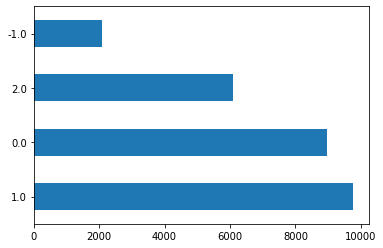

In [8]:
full_set['condition'].value_counts().plot(kind="barh")

<AxesSubplot:>

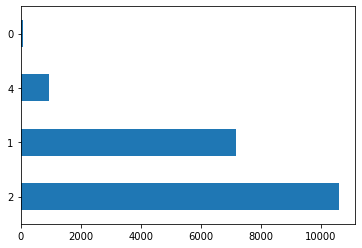

In [10]:
train_set['pet_category'].value_counts().plot(kind='barh')

<AxesSubplot:>

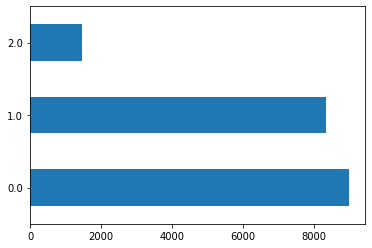

In [11]:
train_set['breed_category'].value_counts().plot(kind='barh')

<AxesSubplot:>

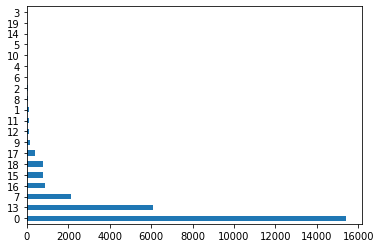

In [12]:
full_set['X1'].value_counts().plot(kind='barh')

<AxesSubplot:>

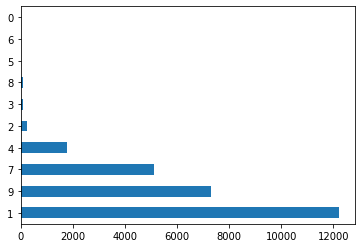

In [13]:
full_set['X2'].value_counts().plot(kind='barh')

In [14]:
full_set['issue_date'] = pd.to_datetime(full_set['issue_date'])

In [15]:
full_set['listing_date'] = pd.to_datetime(full_set['listing_date'])

In [16]:
x=[]
for d in full_set['issue_date']:
    y=d.month
    x.append(y)
full_set['issue_month']=x

In [17]:
x=[]
for d in full_set['listing_date']:
    y=d.month
    x.append(y)
full_set['listing_month']=x

In [18]:
x=[]
for d in full_set['listing_date']:
    y=d.year+(d.month/12.0)+(d.day/365.0)
    x.append(y)
full_set['modified_listing_date']=x

In [19]:
x=[]
for d in full_set['issue_date']:
    y=d.year+(d.month/12.0)+(d.day/365.0)
    x.append(y)
full_set['modified_issue_date']=x

In [20]:
full_set['took_time']=abs(full_set['modified_listing_date']-full_set['modified_issue_date'])

In [21]:
full_set['1stnum'] = full_set['pet_id'].str[:6]
full_set['1st2num'] = full_set['pet_id'].str[:7]

In [22]:
full_set.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,issue_month,listing_month,modified_listing_date,modified_issue_date,took_time,1stnum,1st2num
0,ANSL_69903,2016-07-10,2016-09-21 16:25:00,2.0,Brown Tabby,0.80,7.78,13,9,7,9,2016.807534,2016.610731,0.196804,ANSL_6,ANSL_69
1,ANSL_66892,2013-11-21,2018-12-27 17:47:00,1.0,White,0.72,14.19,13,9,11,12,2019.073973,2013.974201,5.099772,ANSL_6,ANSL_66
2,ANSL_69750,2014-09-28,2016-10-19 08:24:00,-1.0,Brown,0.15,40.90,15,4,9,10,2016.885388,2014.826712,2.058676,ANSL_6,ANSL_69
3,ANSL_71623,2016-12-31,2019-01-25 18:30:00,1.0,White,0.62,17.82,0,1,12,1,2019.151826,2017.084932,2.066895,ANSL_7,ANSL_71
4,ANSL_57969,2017-09-28,2017-11-19 09:38:00,2.0,Black,0.50,11.06,18,4,9,11,2017.968721,2017.826712,0.142009,ANSL_5,ANSL_57


In [25]:
duration = (full_set['listing_date'] - full_set['issue_date']).dt.days
full_set['duration'] = duration
info = pd.DataFrame()
info['length(m)'] = [np.percentile(full_set['length(m)'],25*i) for i in range(1,4)]
info['height(cm)'] = [np.percentile(full_set['height(cm)'],25*i) for i in range(1,4)]
info['duration'] = [np.percentile(full_set['duration'],25*i) for i in range(1,4)]

info.loc[3] = [2.5*info.loc[0,column] - 1.5*info.loc[2,column] for column in info.columns]
info.loc[4] = [2.5*info.loc[2,column] - 1.5*info.loc[0,column] for column in info.columns]
info
def range_part(column,value):
    if value > info.loc[4,column]:
        return 5
    elif value > info.loc[2,column]:
        return 4
    elif value > info.loc[1,column]:
        return 3
    elif value > info.loc[0,column]:
        return 2
    elif value > info.loc[3,column]:
        return 1
    else:
        return 0

from tqdm import tqdm
tqdm.pandas()
full_set['length_range'] = full_set['length(m)'].progress_apply(lambda x:range_part('length(m)',x))
full_set['height_range'] = full_set['height(cm)'].progress_apply(lambda x:range_part('height(cm)',x))
full_set['duration_range'] = full_set['duration'].progress_apply(lambda x:range_part('duration',x))
full_set

100%|██████████| 26906/26906 [00:01<00:00, 22892.54it/s]


,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,issue_month,listing_month,modified_listing_date,modified_issue_date,took_time,1stnum,1st2num,duration,length_range,height_range,duration_range
0,ANSL_69903,2016-07-10,2016-09-21 16:25:00,2.0,Brown Tabby,0.80,7.78,13,9,7,9,2016.807534,2016.610731,0.196804,ANSL_6,ANSL_69,73,4,1,1
1,ANSL_66892,2013-11-21,2018-12-27 17:47:00,1.0,White,0.72,14.19,13,9,11,12,2019.073973,2013.974201,5.099772,ANSL_6,ANSL_66,1862,3,1,4
2,ANSL_69750,2014-09-28,2016-10-19 08:24:00,-1.0,Brown,0.15,40.90,15,4,9,10,2016.885388,2014.826712,2.058676,ANSL_6,ANSL_69,752,1,4,3
3,ANSL_71623,2016-12-31,2019-01-25 18:30:00,1.0,White,0.62,17.82,0,1,12,1,2019.151826,2017.084932,2.066895,ANSL_7,ANSL_71,755,3,2,3
4,ANSL_57969,2017-09-28,2017-11-19 09:38:00,2.0,Black,0.50,11.06,18,4,9,11,2017.968721,2017.826712,0.142009,ANSL_5,ANSL_57,52,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8067,ANSL_66809,2016-02-10,2017-03-10 14:56:00,2.0,Brown,0.82,36.08,13,9,2,3,2017.277397,2016.194064,1.083333,ANSL_6,ANSL_66,394,4,3,3
8068,ANSL_59041,2015-12-07,2018-02-12 00:00:00,0.0,Tan,0.49,27.54,13,9,12,2,2018.199543,2016.019178,2.180365,ANSL_5,ANSL_59,798,2,3,3
8069,ANSL_60034,2015-12-08,2017-01-04 17:19:00,0.0,Black,0.98,37.19,0,7,12,1,2017.094292,2016.021918,1.072374,ANSL_6,ANSL_60,393,4,3,3
8070,ANSL_58066,2016-06-28,2017-07-20 18:19:00,-1.0,Black,0.79,23.83,0,2,6,7,2017.638128,2016.576712,1.061416,ANSL_5,ANSL_58,387,4,2,2


In [27]:
ntrain = len(train_set)
train = full_set[:ntrain]
test = full_set[ntrain:]

In [28]:
x=train.drop(['pet_id','issue_date','listing_date','modified_issue_date'],axis=1)
test=test.drop(['pet_id','issue_date','listing_date','modified_issue_date'],axis=1)

In [29]:
x.select_dtypes(exclude='number').columns.to_list()

['color_type', '1stnum', '1st2num']

In [30]:
x=pd.get_dummies(x)
test=pd.get_dummies(test)

In [31]:
a=set(x.columns)-set(test.columns)

In [32]:
a=list(a)
a

['color_type_Brown Tiger', 'color_type_Black Tiger']

In [33]:
x=x.drop(a,axis=1)

In [34]:
all_data = pd.concat((x, test)).reset_index(drop=True)

In [35]:
from sklearn import preprocessing
# Get column names first
names = all_data.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
scaled_df = scaler.fit_transform(all_data)
all_data = pd.DataFrame(scaled_df, columns=names)

In [36]:
x = all_data[:ntrain]
test = all_data[ntrain:]

x['breed_category'] = train_set['breed_category']
x['pet_category'] = train_set['pet_category']

In [37]:
x.to_csv('input/new_clean_train.csv',index=False)
test.to_csv('input/new_clean_test.csv', index=False)

In [38]:
print(x[''])

Index(['condition', 'length(m)', 'height(cm)', 'X1', 'X2', 'issue_month',
       'listing_month', 'modified_listing_date', 'took_time', 'duration',
       ...
       '1st2num_ANSL_69', '1st2num_ANSL_70', '1st2num_ANSL_71',
       '1st2num_ANSL_72', '1st2num_ANSL_73', '1st2num_ANSL_74',
       '1st2num_ANSL_75', '1st2num_ANSL_76', 'breed_category', 'pet_category'],
      dtype='object', length=101)


In [42]:
###All ranges data

In [126]:
full_set['duration'] = duration

In [127]:
full_set = full_set.drop(['issue_date','listing_date','pet_id'],axis=1)
full_set.head()

,condition,color_type,length(m),height(cm),X1,X2,duration
0,2.0,Brown Tabby,0.80,7.78,13,9,73
1,1.0,White,0.72,14.19,13,9,1862
2,3.0,Brown,0.15,40.90,15,4,752
3,1.0,White,0.62,17.82,0,1,755
4,2.0,Black,0.50,11.06,18,4,52


In [128]:
from sklearn.preprocessing import LabelEncoder

In [129]:
labelencoder = LabelEncoder()
full_set['color_type'] = labelencoder.fit_transform(full_set['color_type'])

In [130]:
full_set.head()

,condition,color_type,length(m),height(cm),X1,X2,duration
0,2.0,18,0.80,7.78,13,9,73
1,1.0,53,0.72,14.19,13,9,1862
2,3.0,15,0.15,40.90,15,4,752
3,1.0,53,0.62,17.82,0,1,755
4,2.0,2,0.50,11.06,18,4,52


In [131]:
full_set['color_type'].nunique()

56

In [132]:
full_set['height(cm)'] = full_set['height(cm)']/100

In [133]:
full_set.head()

,condition,color_type,length(m),height(cm),X1,X2,duration
0,2.0,18,0.80,0.0778,13,9,73
1,1.0,53,0.72,0.1419,13,9,1862
2,3.0,15,0.15,0.4090,15,4,752
3,1.0,53,0.62,0.1782,0,1,755
4,2.0,2,0.50,0.1106,18,4,52


In [134]:
info = pd.DataFrame()
info['length(m)'] = [np.percentile(full_set['length(m)'],25*i) for i in range(1,4)]
info['height(cm)'] = [np.percentile(full_set['height(cm)'],25*i) for i in range(1,4)]
info['duration'] = [np.percentile(full_set['duration'],25*i) for i in range(1,4)]

In [135]:
info

,length(m),height(cm),duration
0,0.25,0.1621,120.0
1,0.50,0.2736,392.0
2,0.76,0.3878,1116.0


In [136]:
info.loc[3] = [2.5*info.loc[0,column] - 1.5*info.loc[2,column] for column in info.columns]
info.loc[4] = [2.5*info.loc[2,column] - 1.5*info.loc[0,column] for column in info.columns]
info

,length(m),height(cm),duration
0,0.250,0.16210,120.0
1,0.500,0.27360,392.0
2,0.760,0.38780,1116.0
3,-0.515,-0.17645,-1374.0
4,1.525,0.72635,2610.0


In [137]:
def range_part(column,value):
    if value > info.loc[4,column]:
        return 5
    elif value > info.loc[2,column]:
        return 4
    elif value > info.loc[1,column]:
        return 3
    elif value > info.loc[0,column]:
        return 2
    elif value > info.loc[3,column]:
        return 1
    else:
        return 0

In [138]:
from tqdm import tqdm
tqdm.pandas()
full_set['length_range'] = full_set['length(m)'].progress_apply(lambda x:range_part('length(m)',x))
full_set['height_range'] = full_set['height(cm)'].progress_apply(lambda x:range_part('height(cm)',x))
full_set['duration_range'] = full_set['duration'].progress_apply(lambda x:range_part('duration',x))
full_set

100%|██████████| 26906/26906 [00:01<00:00, 13804.59it/s]


,condition,color_type,length(m),height(cm),X1,X2,duration,length_range,height_range,duration_range
0,2.0,18,0.80,0.0778,13,9,73,4,1,1
1,1.0,53,0.72,0.1419,13,9,1862,3,1,4
2,3.0,15,0.15,0.4090,15,4,752,1,4,3
3,1.0,53,0.62,0.1782,0,1,755,3,2,3
4,2.0,2,0.50,0.1106,18,4,52,2,1,1
...,...,...,...,...,...,...,...,...,...,...
8067,2.0,15,0.82,0.3608,13,9,394,4,3,3
8068,0.0,48,0.49,0.2754,13,9,798,2,3,3
8069,0.0,2,0.98,0.3719,0,7,393,4,3,3
8070,3.0,2,0.79,0.2383,0,2,387,4,2,2


In [139]:
train_set = pd.DataFrame()
test_set = pd.DataFrame()
train_set = full_set.iloc[:len(train)]
test_set = full_set[len(train):]

In [140]:
train_set['breed_category'] = train['breed_category']
train_set['pet_category'] = train['pet_category']

In [141]:
train_set.head()

,condition,color_type,length(m),height(cm),X1,X2,duration,length_range,height_range,duration_range,breed_category,pet_category
0,2.0,18,0.80,0.0778,13,9,73,4,1,1,0.0,1
1,1.0,53,0.72,0.1419,13,9,1862,3,1,4,0.0,2
2,3.0,15,0.15,0.4090,15,4,752,1,4,3,2.0,4
3,1.0,53,0.62,0.1782,0,1,755,3,2,3,0.0,2
4,2.0,2,0.50,0.1106,18,4,52,2,1,1,0.0,1


In [145]:
test_set['pet_id'] = test['pet_id']
test_set.head()

,condition,color_type,length(m),height(cm),X1,X2,duration,length_range,height_range,duration_range,pet_id
0,0.0,2,0.87,0.4273,0,7,4404,4,4,5,ANSL_75005
1,1.0,38,0.06,0.0671,0,1,174,1,1,2,ANSL_76663
2,1.0,2,0.24,0.4121,0,7,1999,1,4,4,ANSL_58259
3,1.0,2,0.29,0.0846,7,1,1148,2,1,4,ANSL_67171
4,1.0,15,0.71,0.3092,0,7,463,3,3,3,ANSL_72871


In [148]:
train_set.to_csv('input/clean_train.csv',index=False)
test_set.to_csv('input/clean_test.csv',index=False)

In [147]:
train_set.pet_category.values

array([1, 2, 4, ..., 1, 2, 2], dtype=int64)